## ESA CCI Open Data Portal access using xcube

This notebook shows how to open data cubes from the ESA CCI Open Data Portal for a given time range and region:

1. A **temporarily regular cube** with aggregated CCI data that fall into equal-size time periods;

To run this Notebook, make sure the ESA CCI ODP / xcube Integration is setup correctly, see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).
To get more information about the datasets provided by the store, see [Ex1a-DCFS-CCI_access](./Ex1a-DCFS-CCI_access.ipynb). 
Again, necessary imports come first.

In [1]:
from xcube_cci.dataaccess import CciOdpDataStore
import IPython.display
import shapely

In [2]:
%matplotlib inline
from xcube.util.ipython import enable_asyncio
enable_asyncio()

We start with creating the store.

In [3]:
cci_store = CciOdpDataStore()

For this demo, we are using the dataset with the id 'esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1'. Here is its metadata again:

In [4]:
cci_store.describe_data('esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1')

For this demo, we are focussing on Africa.

In [5]:
x1 = -23.40  # degree
y1 = -40.40  # degree
x2 = 57.40  # degree
y2 = 40.40  # degree

bbox = (x1, y1, x2, y2)

Visualize the bounding box. If you don't see anything, please refer to [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [6]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Our time range covers data from 1997: 1997-01-01 to 1997-12-01

---
Now to open the dataset. You may check its metadata first to make sure that your parameters are valid.

In [7]:
cci_store.get_open_data_params_schema(data_id='esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1', opener_id='dataset[cube]:zarr:cciodp')

Select any valid combination from the paramater in *properties* above. The only mandatory parameter is the data_id. If you leave any parameter out, all available values will be considered. Make sure to set the *opener_id* to *dataset[cube]:zarr:cciodp*. If you don't, please make sure that the other parameters are available for non-cube datasets.

In [8]:
cube = cci_store.open_data('esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
                           variable_names=['absorbing_aerosol_index'],
                           bbox=bbox,
                           time_range=['2005-01-01', '2005-12-31'],
                           opener_id='dataset[cube]:zarr:cciodp')
cube

<xarray.Dataset>
Dimensions:                  (bnds: 2, lat: 80, lon: 80, time: 12)
Coordinates:
  * lat                      (lat) float32 -39.5 -38.5 -37.5 ... 37.5 38.5 39.5
  * lon                      (lon) float32 -22.5 -21.5 -20.5 ... 54.5 55.5 56.5
  * time                     (time) datetime64[ns] 2005-01-16T12:00:00 ... 20...
    time_bnds                (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    absorbing_aerosol_index  (time, lat, lon) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-pla...
    date_created:            2021-07-02T15:06:11.627245
    processing_level:        L3
    time_coverage_start:     2005-01-01T00:00:00
    time_coverage_end:       2006-01-01T00:00:00
    time_coverage_duration:  P365DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We may visualize the cube's time coordinates:

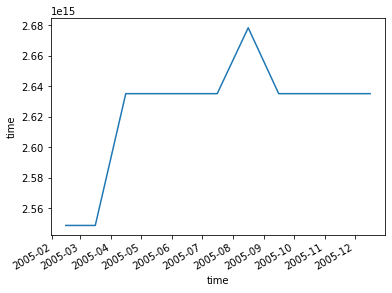

In [9]:
cube.time.diff(dim='time').plot.line()

And finally, display the results:

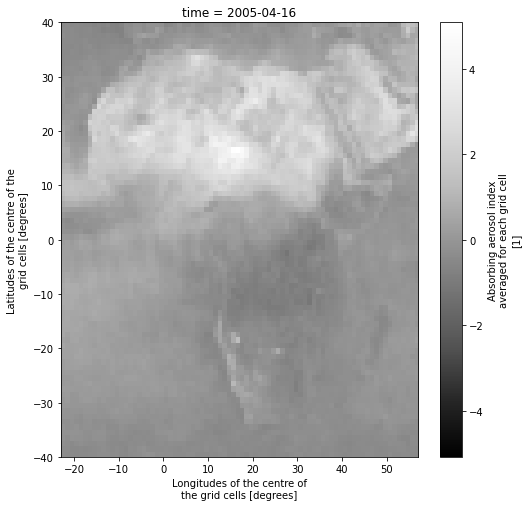

In [10]:
cube.absorbing_aerosol_index.sel(time='2005-04-15 12:00:00', method='nearest').plot.imshow(cmap='Greys_r', figsize=(8, 8))